# Engenharia de Software aplicada a Ciência de Dados
Aluno: João Lucas Marques Correia (2112514)



# Descrição dos requisitos




### Fonte dos dados 

O dataset utilizado está disponível em: [Cervical Cancer Risk Factors](https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29).

### Descrição do dataset 

Este dataset foi coletado no Hospital Universitário de Caracas, em Caracas na Venezuela. O dataset é composto de informações demográficas, hábitos e o histórico médico de 858 pacientes. As variáveis alvo deste dataset é o resultado de exames que indicam se a pessoa possui ou não câncer cervical.

### Tipo de problema

O usuário espera que dado um conjunto de atributos, o modelo seja capaz de indicar se uma pessoa possui ou não **predisposição** a desenvolver câncer cervical. Logo, o problem aqui trabalhado será de **classificação**.


### Entrada

Os atributos (e seu tipo) contidos neste dataset, estão descritos na tabela abaixo:

|                             |                         |                         |
|---------------------------------------|-------------------------------------------|----------------------------------------|
| (int) Age                              | (int) STDs (number)                       | (bool) STDs:HPV                                  |
| (int) Number of sexual partners        | (bool) STDs:condylomatosis                | (int) STDs: Number of diagnosis                  |
| (int) First sexual intercourse (age)   | (bool) STDs:cervical condylomatosis       | (float) STDs: Time since first diagnosis (years) |
| (int) Num of pregnancies               | (bool) STDs:vaginal condylomatosis        | (float) STDs: Time since last diagnosis  (years) |
| (bool) Smokes                          | (bool) STDs:vulvo-perineal condylomatosis | (bool) Dx:Cancer                                 |
| (float) Smokes (years)                 | (bool) STDs:syphilis                      | (bool) Dx:CIN                                    |
| (float) Smokes (packs/year)            | (bool) STDs:pelvic inflammatory disease   | (bool) Dx:HPV                                    |
| (bool) Hormonal Contraceptives         | (bool) STDs:genital herpes                | (bool) Dx                                        |
| (float) Hormonal Contraceptives (years)| (bool) STDs:molluscum contagiosum         | (bool) Hinselmann: target variable               |
| (bool) IUD                             | (bool) STDs:AIDS                          | (bool) Schiller: target variable                 |
| (float) IUD (years)                    | (bool) STDs:HIV                           | (bool) Cytology: target variable                 |
| (bool) STDs                            | (bool) STDs:Hepatitis B                   | (bool) Biopsy: target variable                   |

* Siglas:
  * IUD: Dispositivo intrauterino
  * STDs: Doença sexualmente transmissível
  * DX: Não identificado

### Saída

Dado um conjunto de valores de entrada desconhecidos, o modelo deve ser capaz de produzir uma variável booleana que indica a predisposição do indivíduo possuir câncer cervical.

# Coleta de dados

### Instalando pacotes necessários

In [1]:
!pip3 install pandas
!pip install scikit-learn
!pip install numpy

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Lendo dataset

In [2]:
class Loader:
  """
  Esta classe modela o leitor de dados e suas funções
  """
  def __init__(self, column_names, url_dataset):
    """
    Construtor da classe
    """
    self.column_names = column_names
    self.url_dataset = url_dataset

  def load_data(self):
    """
    Carrega o dataset do endereço remoto, com as colunas renomeadas.
    """
    dataset = pd.read_csv(self.url_dataset, names=self.column_names, header=0)
    return dataset


O dataset é lido de um csv hospedado em um endereço remoto. Em seguida, é convertido para um dataframe pandas.

In [3]:
# URL do dataset
url_dataset = "https://gist.githubusercontent.com/correiajoao/78dddcef7df94d2e5fd5e44417834d02/raw/59555b4aa73b2cb268e67c1a4d05c567a3354180/risk_factors_cervical_cancer.csv" 
# Nome das colunas para renomear 
column_names = ["age","number_of_sexual_partners","first_sexual_intercourse_age","num_of_pregnancies","smokes","smokes_years","smokes_packs_per_year","hormonal_contraceptives","hormonal_contraceptives_years","iud","iud_years","stds","stds_number","condylomatosis","cervical_condylomatosis","vaginal_condylomatosis","vulvo_perineal_condylomatosis","syphilis","pelvic_inflammatory_disease","genital_herpes","molluscum_contagiosum","aids","hiv","hepatitis_b","hpv","number_of_diagnosis","time_since_first_diagnosis","time_since_last_diagnosis","dx_cancer","dx_cin","dx_hpv","dx","hinselmann_target_variable","schiller_target_variable","cytology_target_variable","biopsy_target_variable"]

# Instancia o Loader
loader = Loader(url_dataset=url_dataset, column_names=column_names)

# Carrega o dataset
dataset = loader.load_data()
# Mostra as dez primeiras linhas
dataset.head(10)


,age,number_of_sexual_partners,first_sexual_intercourse_age,num_of_pregnancies,smokes,smokes_years,smokes_packs_per_year,hormonal_contraceptives,hormonal_contraceptives_years,iud,...,time_since_first_diagnosis,time_since_last_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,hinselmann_target_variable,schiller_target_variable,cytology_target_variable,biopsy_target_variable
0,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
3,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
4,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,...,NaN,NaN,0,0,0,0,1,1,0,1
6,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
7,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,1,0,1,1,0,0,0,0
8,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0
9,44,3.0,26.0,4.0,0.0,0.000000,0.0,1.0,2.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


# Pré-processamento

In [4]:
import missingno as ms

class PreProcessor():
  """
  Esta classe modela o pré-processador de dados e suas funções.
  """

  def __init__(self, dataset):
    self.dataset = dataset
    # Porção do dataset com casos positivos
    self.dataset_true = dataset[(dataset["hinselmann_target_variable"] == 1) | (dataset["schiller_target_variable"]  == 1) | (dataset["cytology_target_variable"] == 1) | (dataset["biopsy_target_variable"]  == 1)]
    # Porção do dataset com casos negativos
    self.dataset_false = dataset[(dataset["hinselmann_target_variable"] == 0) & (dataset["schiller_target_variable"]  == 0) & (dataset["cytology_target_variable"] == 0) & (dataset["biopsy_target_variable"]  == 0)]
  
  def plot_correlation(self):
    """
    Esta função plota um gráfico com o mapa de calor da correlação dos atributos do dataset.
    """
    sns.set(rc = {'figure.figsize':(20,10)})
    sns.heatmap(self.dataset.corr(), annot=True, cmap='RdBu');
    plt.show()
  
  def plot_distribution(self):
    """
    Esta função plota um gráfico com boxplots que mostram a distribuição dos atributos do dataset.
    """
    sns.set(rc = {'figure.figsize':(20,10)})
    sns.boxplot(x="variable", y="value", data=pd.melt(dataset));
    plt.xticks(rotation=90)
    plt.show()

  def plot_missing(self):
    ms.matrix(self.dataset)

  def fill_na(self):
    """
    Esta função preenche dados faltantes, com base na distribuição do grupo ao qual a instância com dados faltantes pertence.
    """
    # Preenchendo dados nulos para os casos positvos (mediana)
    fill_dict = {"age" : self.dataset_true["age"].median(), "number_of_sexual_partners" : self.dataset_true["number_of_sexual_partners"].median(), "first_sexual_intercourse_age" : self.dataset_true["first_sexual_intercourse_age"].median(), "num_of_pregnancies" : self.dataset_true["num_of_pregnancies"].median(), "smokes" : self.dataset_true["smokes"].median(), "smokes_years" : self.dataset_true["smokes_years"].median(), "smokes_packs_per_year" : self.dataset_true["smokes_packs_per_year"].median(), "hormonal_contraceptives" : self.dataset_true["hormonal_contraceptives"].median(), "hormonal_contraceptives_years" : self.dataset_true["hormonal_contraceptives_years"].median(), "iud" : self.dataset_true["iud"].median(), "iud_years" : self.dataset_true["iud_years"].median(), "stds" : self.dataset_true["stds"].median(), "stds_number" : self.dataset_true["stds_number"].median(), "condylomatosis" : self.dataset_true["condylomatosis"].median(), "cervical_condylomatosis" : self.dataset_true["cervical_condylomatosis"].median(), "vaginal_condylomatosis" : self.dataset_true["vaginal_condylomatosis"].median(), "vulvo_perineal_condylomatosis" : self.dataset_true["vulvo_perineal_condylomatosis"].median(), "syphilis" : self.dataset_true["syphilis"].median(), "pelvic_inflammatory_disease" : self.dataset_true["pelvic_inflammatory_disease"].median(), "genital_herpes" : self.dataset_true["genital_herpes"].median(), "molluscum_contagiosum" : self.dataset_true["molluscum_contagiosum"].median(), "aids" : self.dataset_true["aids"].median(), "hiv" : self.dataset_true["hiv"].median(), "hepatitis_b" : self.dataset_true["hepatitis_b"].median(), "hpv" : self.dataset_true["hpv"].median(), "number_of_diagnosis" : self.dataset_true["number_of_diagnosis"].median(), "time_since_first_diagnosis" : self.dataset_true["time_since_first_diagnosis"].median(), "time_since_last_diagnosis" : self.dataset_true["time_since_last_diagnosis"].median(), "dx_cancer" : self.dataset_true["dx_cancer"].median(), "dx_cin" : self.dataset_true["dx_cin"].median(), "dx_hpv" : self.dataset_true["dx_hpv"].median(), "dx" : self.dataset_true["dx"].median(), "hinselmann_target_variable" : self.dataset_true["hinselmann_target_variable"].median(), "schiller_target_variable" : self.dataset_true["schiller_target_variable"].median(), "cytology_target_variable" : self.dataset_true["cytology_target_variable"].median(), "biopsy_target_variable": self.dataset_true["biopsy_target_variable"].median()}
    self.dataset_true = self.dataset_true.fillna(value=fill_dict)

    # Preenchendo dados nulos para os casos negativos (mediana)
    fill_dict = {"age" : self.dataset_false["age"].median(), "number_of_sexual_partners" : self.dataset_false["number_of_sexual_partners"].median(), "first_sexual_intercourse_age" : self.dataset_false["first_sexual_intercourse_age"].median(), "num_of_pregnancies" : self.dataset_false["num_of_pregnancies"].median(), "smokes" : self.dataset_false["smokes"].median(), "smokes_years" : self.dataset_false["smokes_years"].median(), "smokes_packs_per_year" : self.dataset_false["smokes_packs_per_year"].median(), "hormonal_contraceptives" : self.dataset_false["hormonal_contraceptives"].median(), "hormonal_contraceptives_years" : self.dataset_false["hormonal_contraceptives_years"].median(), "iud" : self.dataset_false["iud"].median(), "iud_years" : self.dataset_false["iud_years"].median(), "stds" : self.dataset_false["stds"].median(), "stds_number" : self.dataset_false["stds_number"].median(), "condylomatosis" : self.dataset_false["condylomatosis"].median(), "cervical_condylomatosis" : self.dataset_false["cervical_condylomatosis"].median(), "vaginal_condylomatosis" : self.dataset_false["vaginal_condylomatosis"].median(), "vulvo_perineal_condylomatosis" : self.dataset_false["vulvo_perineal_condylomatosis"].median(), "syphilis" : self.dataset_false["syphilis"].median(), "pelvic_inflammatory_disease" : self.dataset_false["pelvic_inflammatory_disease"].median(), "genital_herpes" : self.dataset_false["genital_herpes"].median(), "molluscum_contagiosum" : self.dataset_false["molluscum_contagiosum"].median(), "aids" : self.dataset_false["aids"].median(), "hiv" : self.dataset_false["hiv"].median(), "hepatitis_b" : self.dataset_false["hepatitis_b"].median(), "hpv" : self.dataset_false["hpv"].median(), "number_of_diagnosis" : self.dataset_false["number_of_diagnosis"].median(), "time_since_first_diagnosis" : self.dataset_false["time_since_first_diagnosis"].median(), "time_since_last_diagnosis" : self.dataset_false["time_since_last_diagnosis"].median(), "dx_cancer" : self.dataset_false["dx_cancer"].median(), "dx_cin" : self.dataset_false["dx_cin"].median(), "dx_hpv" : self.dataset_false["dx_hpv"].median(), "dx" : self.dataset_false["dx"].median(), "hinselmann_target_variable" : self.dataset_false["hinselmann_target_variable"].median(), "schiller_target_variable" : self.dataset_false["schiller_target_variable"].median(), "cytology_target_variable" : self.dataset_false["cytology_target_variable"].median(), "biopsy_target_variable": self.dataset_false["biopsy_target_variable"].median()}
    self.dataset_false = self.dataset_false.fillna(value=fill_dict)

    # Recompondo o dataset
    self.dataset = pd.concat([self.dataset_true, self.dataset_false], axis=0)

    # Caso reste algum valor nulo (mediana nula), os valores são substituídos pela média. 
    fill_dict = {"age" : self.dataset["age"].mean(), "number_of_sexual_partners" : self.dataset["number_of_sexual_partners"].mean(), "first_sexual_intercourse_age" : self.dataset["first_sexual_intercourse_age"].mean(), "num_of_pregnancies" : self.dataset["num_of_pregnancies"].mean(), "smokes" : self.dataset["smokes"].mean(), "smokes_years" : self.dataset["smokes_years"].mean(), "smokes_packs_per_year" : self.dataset["smokes_packs_per_year"].mean(), "hormonal_contraceptives" : self.dataset["hormonal_contraceptives"].mean(), "hormonal_contraceptives_years" : self.dataset["hormonal_contraceptives_years"].mean(), "iud" : self.dataset["iud"].mean(), "iud_years" : self.dataset["iud_years"].mean(), "stds" : self.dataset["stds"].mean(), "stds_number" : self.dataset["stds_number"].mean(), "condylomatosis" : self.dataset["condylomatosis"].mean(), "cervical_condylomatosis" : self.dataset["cervical_condylomatosis"].mean(), "vaginal_condylomatosis" : self.dataset["vaginal_condylomatosis"].mean(), "vulvo_perineal_condylomatosis" : self.dataset["vulvo_perineal_condylomatosis"].mean(), "syphilis" : self.dataset["syphilis"].mean(), "pelvic_inflammatory_disease" : self.dataset["pelvic_inflammatory_disease"].mean(), "genital_herpes" : self.dataset["genital_herpes"].mean(), "molluscum_contagiosum" : self.dataset["molluscum_contagiosum"].mean(), "aids" : self.dataset["aids"].mean(), "hiv" : self.dataset["hiv"].mean(), "hepatitis_b" : self.dataset["hepatitis_b"].mean(), "hpv" : self.dataset["hpv"].mean(), "number_of_diagnosis" : self.dataset["number_of_diagnosis"].mean(), "time_since_first_diagnosis" : self.dataset["time_since_first_diagnosis"].mean(), "time_since_last_diagnosis" : self.dataset["time_since_last_diagnosis"].mean(), "dx_cancer" : self.dataset["dx_cancer"].mean(), "dx_cin" : self.dataset["dx_cin"].mean(), "dx_hpv" : self.dataset["dx_hpv"].mean(), "dx" : self.dataset["dx"].mean(), "hinselmann_target_variable" : self.dataset["hinselmann_target_variable"].mean(), "schiller_target_variable" : self.dataset["schiller_target_variable"].mean(), "cytology_target_variable" : self.dataset["cytology_target_variable"].mean(), "biopsy_target_variable": self.dataset["biopsy_target_variable"].mean()}
    self.dataset = self.dataset.fillna(value=fill_dict)
    return self.dataset

  def balance(self):
    """
    Esta função balanceia as instâncias positivas e negativas do dataset.
    """
    # Mantemos todas as instâncias positivas do dataset
    self.dataset_true = self.dataset_true

    # Número de instâncias e colunas na porção positivas do dataset
    n_rows, n_columns = self.dataset_true.shape

    # Buscamos aleatoriamente instâncias negativas, no total duas vezes o número de instâncias positivas
    self.dataset_false = self.dataset_false.sample(n = 2 * n_rows, replace=False, random_state=15)

    # Compomos o dataset balanceado
    self.dataset = pd.concat([self.dataset_true, self.dataset_false], axis=0)
    return self.dataset
    
  def convert(self, convert_dict):
    """
    Esta função converte os tipo de dados dos atributos de um dataframe.
    """
    self.dataset = self.dataset.astype(convert_dict)
    return self.dataset

  def filter_columns(self, columns):
    """
    Esta função filtra colunas de um dataframe.
    """
    self.dataset = self.dataset[columns]
    return self.dataset

  def create_target(self):
      """
      Esta função reduz as variáveis alvo da classificação em apenas uma.
      """
      def generate_target_column(row):
        if row['hinselmann_target_variable'] == True or row['schiller_target_variable'] == True or row['cytology_target_variable'] == True or row['biopsy_target_variable'] == True:
          row['target'] = True
        else:
          row['target'] = False

        del row["hinselmann_target_variable"]
        del row["schiller_target_variable"]
        del row["cytology_target_variable"]
        del row["biopsy_target_variable"]

        return row

      # Aplica a cada linha a função que irá preencher a nova coluna
      self.dataset = self.dataset.apply(generate_target_column, axis=1)
      return self.dataset


In [5]:
# Instanciando o PreProcessor
processor = PreProcessor(dataset)

### Correlação dos dados brutos

Aqui analisamos a correlação dos dados brutos.

Em geral, prover atributos fortemente correlacionados (redundantes) para um modelo, não melhora o seu desempenho. Somado a isto, atributos redundantes aumenta complexidade do dataset e o custo computacional.

Por isto, abaixo faremos uma análise da correlação dos atributos do nosso dataset, buscando indícios de atributos que podem ser reduzidos.

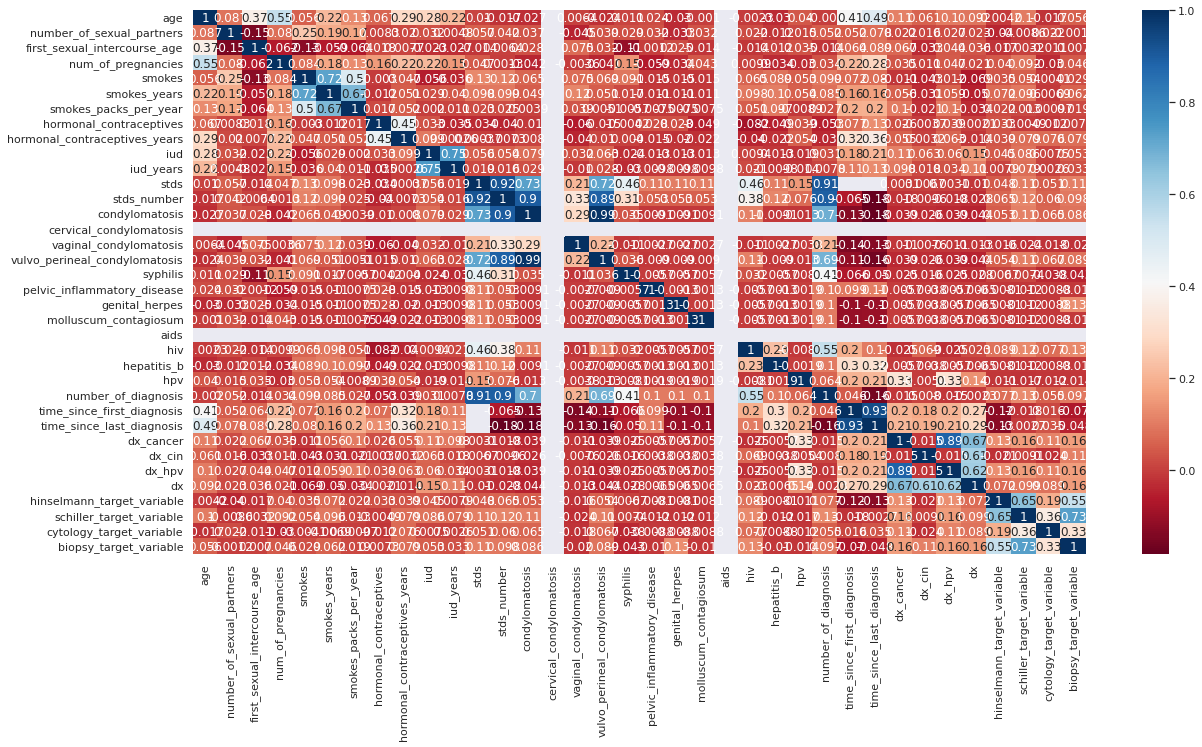

In [6]:
processor.plot_correlation()

Algumas correlações observadas, são:

  - As variáveis alvo da classificação (os exames que indicam câncer) tem uma correlaçõa positiva entre si. Isto é, se um exame indicou a presença de câncer, provavelmente outros irão indicar, ou o inverso.

  - As variáveis que descrevem uso de cigarro tem correlação positiva entre si (uso de cigarro, quantidade de massos, anos de uso).

  - O número diagnósticos de DSTs tem correlação positiva com a variável que indica a quantidade de DSTs. Provavelmente uma variável é o número de diagnósticos via exames, e a outra o número de diagnósticos auto afirmados. 

  - Algumas DSTs (vulvo_perineal_condylomatosis, syphilis, condylomatosis, hiv) possuem correlação positiva com o número de diagnósticos de DSTs. Isto pode indicar que a presença dessas DSTs, estão associadas a presença de outras. 

  - O tempo (em anos) desde o primeiro e último diagnóstico de DSTs se correlacionam positivamente com a idade, tempo de uso de contracptivos hormonais, além de outras variáveis medidas em anos. 

  - O tempo entre o primeiro e o último diagnóstico de DST estão positivamente correlacionados. Como a média de DSTs para o paciente diagnosticado é 1, o tempo desde o último e o primeiro diagnóstico são iguais.


Dadas as observações acima, é viável reduzir variáveis fortemente correlacionadas em uma que nos dê ganho de informação suficiente para os modelos. Faremos isto na última etapa do processamento de dados, pois, até lá iremos utilizar todos os atributos para o preenchimento dos dados faltantes.

### Distribuição dos dados brutos

Visualizaremos a distribuição dos dados brutos. 

Note que muitas variáveis são booleanas e afetam a forma do boxplot. Verifique a lista completa na descricão.

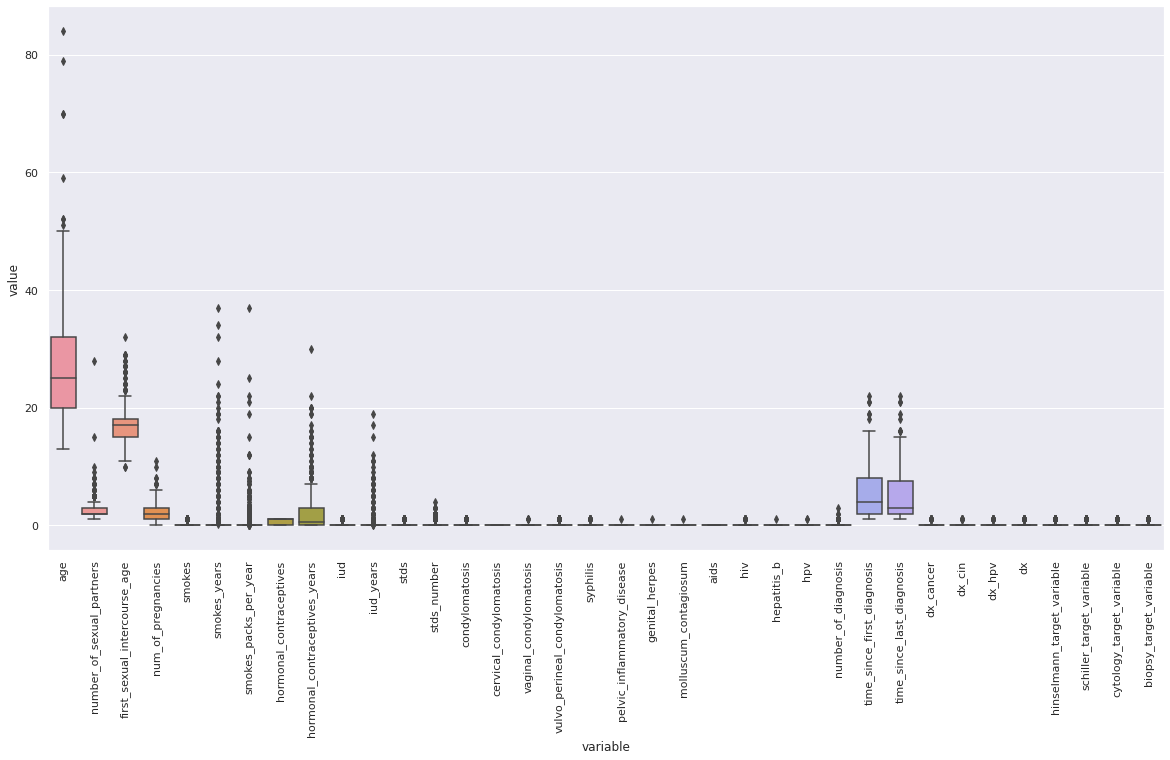

In [7]:
processor.plot_distribution()

### Tratando dados faltantes

A classe PreProcessor separa os dados brutos em dois grupos, um grupo dos dados com variável alvo positiva (diagnóstico de câncer) e um grupo com a variável alvo negativa. Assim, quando encontrarmos dados faltantes, **podemos atribuir valores do grupo que a observação pertence**.



Abaixo, temos uma visualização matricial do nosso dataset antes da substituição de dados faltantes. Observe que os atributos relacionados ao diagnóstico de DSTs possuem frequente falta de dados. 

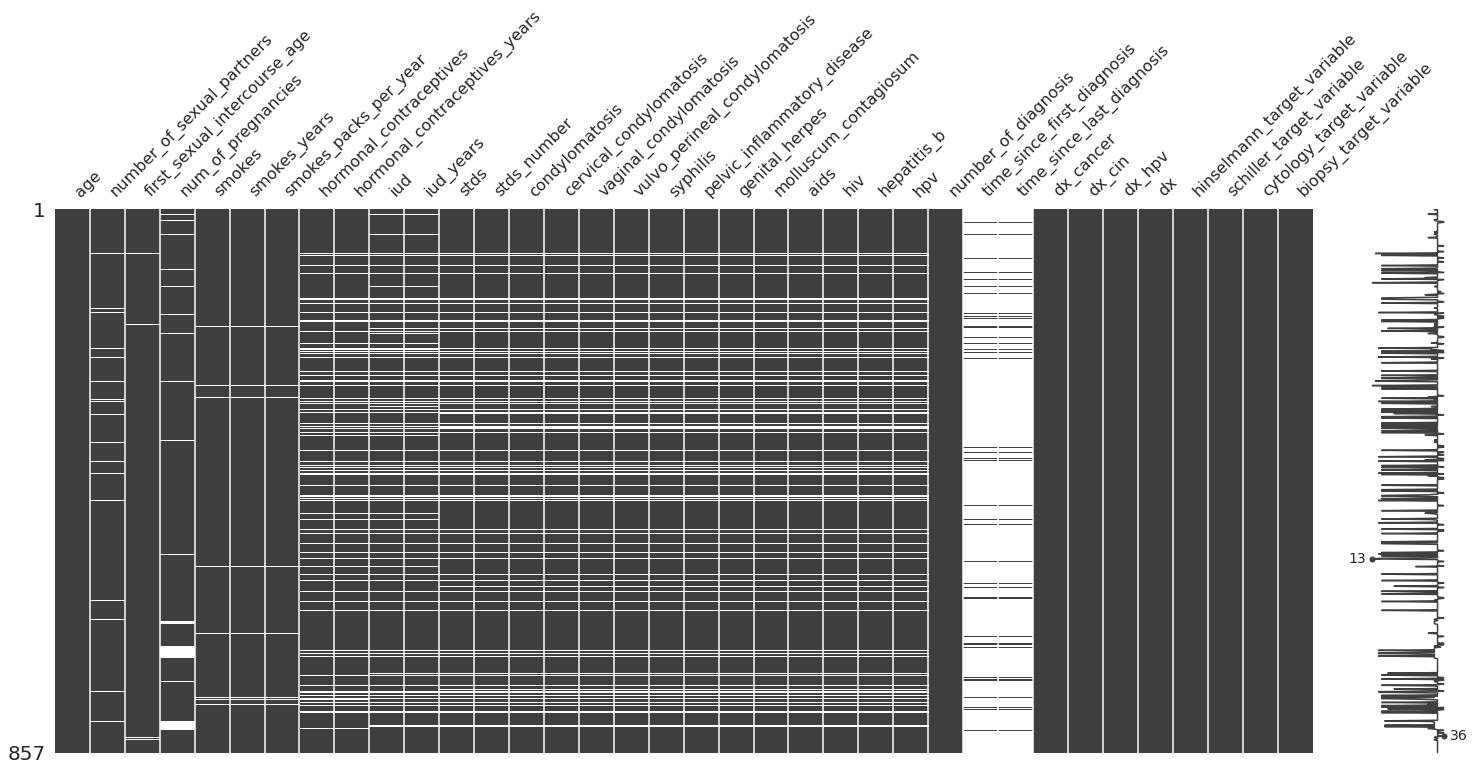

In [8]:
processor.plot_missing()

In [9]:
# Preenche os valores NaN do dataset
dataset = processor.fill_na()

# Converte as colunas do dataset para o tipo de dados esperado.
convert_dict = {"age" : int, "number_of_sexual_partners" : int, "first_sexual_intercourse_age" : int, "num_of_pregnancies" : int, "smokes" : bool, "smokes_years" : float, "smokes_packs_per_year" : float, "hormonal_contraceptives" : bool, "hormonal_contraceptives_years" : float, "iud" : bool, "iud_years" : float, "stds" : bool, "stds_number" : int, "condylomatosis" : bool, "cervical_condylomatosis" : bool, "vaginal_condylomatosis" : bool, "vulvo_perineal_condylomatosis" : bool, "syphilis" : bool, "pelvic_inflammatory_disease" : bool, "genital_herpes" : bool, "molluscum_contagiosum" : bool, "aids" : bool, "hiv" : bool, "hepatitis_b" : bool, "hpv" : bool, "number_of_diagnosis" : int, "time_since_first_diagnosis" : int, "time_since_last_diagnosis" : int, "dx_cancer" : bool, "dx_cin" : bool, "dx_hpv" : bool, "dx" : bool, "hinselmann_target_variable" : bool, "schiller_target_variable" : bool, "cytology_target_variable" : bool, "biopsy_target_variable": bool}
dataset = processor.convert(convert_dict)

# Descreve o estado corrente do dataset 
dataset.describe()


,age,number_of_sexual_partners,first_sexual_intercourse_age,num_of_pregnancies,smokes_years,smokes_packs_per_year,hormonal_contraceptives_years,iud_years,stds_number,number_of_diagnosis,time_since_first_diagnosis,time_since_last_diagnosis
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,26.830805,2.509918,16.997666,2.259043,1.202642,0.480604,2.037613,0.445123,0.155193,0.087515,3.358226,3.331389
std,8.497558,1.644932,2.792680,1.401140,4.062786,2.366762,3.568485,1.815214,0.529900,0.302707,1.905178,1.831668
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,3.000000,3.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000,22.000000,22.000000


Abaixo, verificaremos a visualização matricial do nosso dataset **após** os dados faltantes serem substituídos.

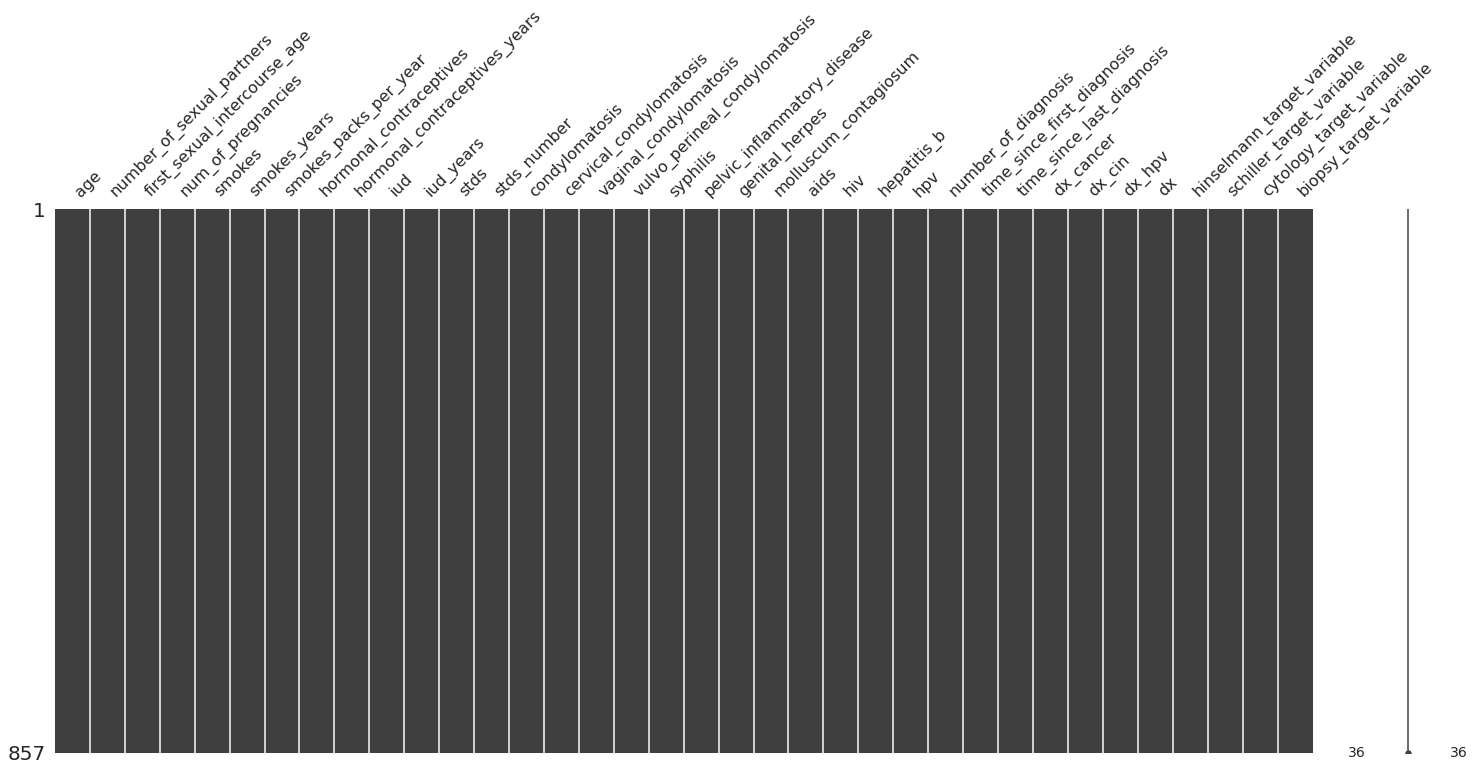

In [10]:
processor.plot_missing()

### Balanceando o dataset

Este dataset possui um desbalanceamento entre casos positivos e negativos, o que pode gerar um viés para os modelos. Assim, **balanceamentos o dataset com 1/3 de instâncias positivas e 2/3 negativas**.

In [11]:
dataset = processor.balance()
dataset.describe()

,age,number_of_sexual_partners,first_sexual_intercourse_age,num_of_pregnancies,smokes,smokes_years,smokes_packs_per_year,hormonal_contraceptives,hormonal_contraceptives_years,iud,...,time_since_first_diagnosis,time_since_last_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,hinselmann_target_variable,schiller_target_variable,cytology_target_variable,biopsy_target_variable
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,...,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,27.199346,2.519608,16.954248,2.264706,0.163399,1.457849,0.465041,0.699346,2.418504,0.111111,...,3.460784,3.454248,0.032680,0.019608,0.032680,0.045752,0.114379,0.241830,0.143791,0.179739
std,9.106085,1.328604,2.593409,1.427550,0.370335,4.542525,1.868584,0.459293,4.275740,0.314784,...,1.473292,1.479765,0.178088,0.138875,0.178088,0.209288,0.318792,0.428893,0.351452,0.384598
min,14.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.500000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,9.000000,29.000000,11.000000,1.000000,34.000000,19.000000,1.000000,30.000000,1.000000,...,16.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Tratando a variável alvo

Existem quatro variáveis alvo, cada uma delas representa um tipo de exame que indica se a pessoa possui ou diagnóstico de câncer. **Iremos transformar essas quatro variáveis em apenas uma (target), indicando o dignóstico do paciente**.

In [12]:
dataset = processor.create_target()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 5 to 247
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            306 non-null    float64
 1   number_of_sexual_partners      306 non-null    float64
 2   first_sexual_intercourse_age   306 non-null    float64
 3   num_of_pregnancies             306 non-null    float64
 4   smokes                         306 non-null    float64
 5   smokes_years                   306 non-null    float64
 6   smokes_packs_per_year          306 non-null    float64
 7   hormonal_contraceptives        306 non-null    float64
 8   hormonal_contraceptives_years  306 non-null    float64
 9   iud                            306 non-null    float64
 10  iud_years                      306 non-null    float64
 11  stds                           306 non-null    float64
 12  stds_number                    306 non-null    flo

### Removendo atributos correlacionados

Conforme mencionado anteriormente, alguns atributos estão correlacionados. Aqui selecionamos um conjunto de atributos mais relevantes.

Por exemplo, o diagnóstico de DSTs que possuí variáveis correlatas, mantivemos apenas o atributo booleano que indica a presença de DSTs e o número de diagnósticos.

PS: Em testes com todos os atributos, o desempenho dos modelos se mantêm o mesmo.


In [13]:
# Colunas de interesse a serem filtradas
columns = ["age","number_of_sexual_partners","first_sexual_intercourse_age","num_of_pregnancies","smokes","smokes_years","hormonal_contraceptives","hormonal_contraceptives_years","iud","iud_years","stds","stds_number","time_since_first_diagnosis","dx_cancer","dx_cin","dx_hpv","dx","target"]

# Selecionamos apenas um conjunto de colunas do dataset.
dataset = processor.filter_columns(columns)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 5 to 247
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            306 non-null    float64
 1   number_of_sexual_partners      306 non-null    float64
 2   first_sexual_intercourse_age   306 non-null    float64
 3   num_of_pregnancies             306 non-null    float64
 4   smokes                         306 non-null    float64
 5   smokes_years                   306 non-null    float64
 6   hormonal_contraceptives        306 non-null    float64
 7   hormonal_contraceptives_years  306 non-null    float64
 8   iud                            306 non-null    float64
 9   iud_years                      306 non-null    float64
 10  stds                           306 non-null    float64
 11  stds_number                    306 non-null    float64
 12  time_since_first_diagnosis     306 non-null    flo

### Correlação dos dados tratados

Aqui, iremos visualizar novamente a correlação dos dados tratados e balanceados.

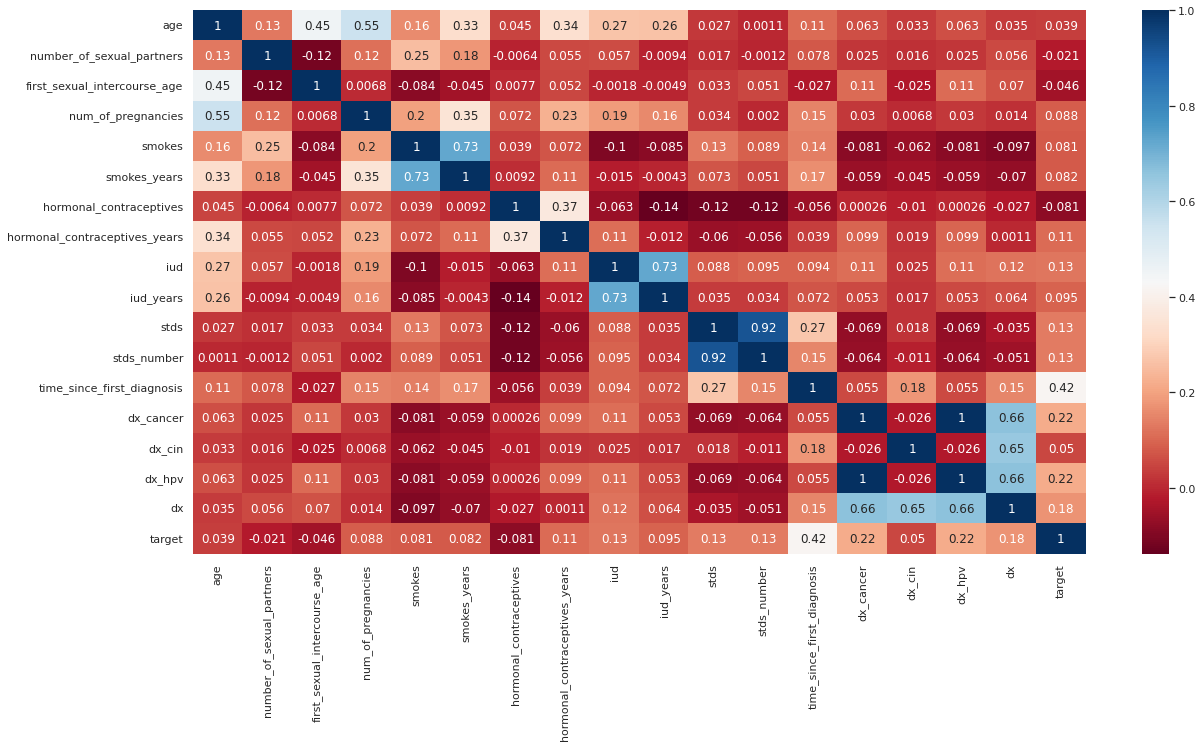

In [14]:
processor.plot_correlation()

Note que o atibuto *target*, majoritariamente apresenta correlação positiva com os atributos selecionados.

### Distribuição do dataset tratado


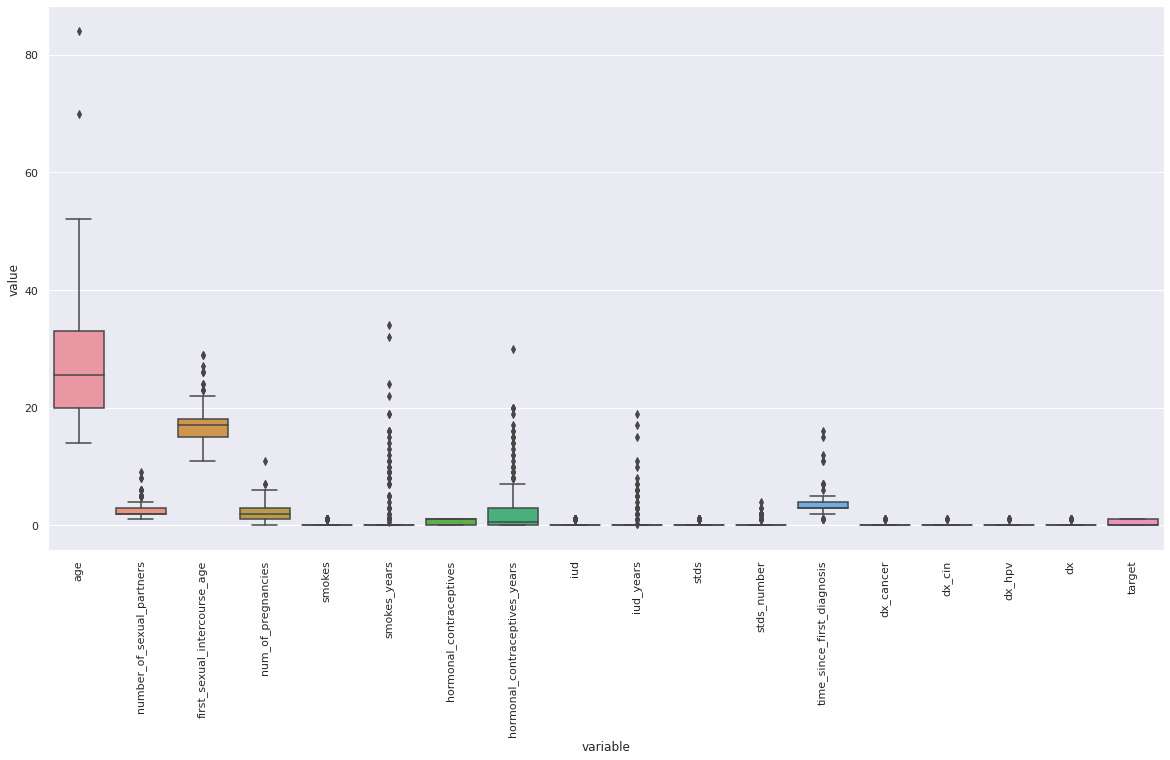

In [15]:
processor.plot_distribution()

Como os atributos possuem distribuições distintas e isso pode afetar o desempenho dos modelos, nos passos seguintes **iremos normalizar os atributos entre 0 e 1.**

# Classificador

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

class ModelExperimenter:
  """
  Esta classe modela o um experimentador de modelos.
  """
  TEST_SIZE = 0.30
  RANDOM_STATE = 7000
  NUM_FOLDERS = 5 
  SCORING = 'f1'

  def __init__(self):
    self.x_train = None
    self.y_train = None
    self.x_test = None
    self.y_test = None

    self.models_pipeline = None
    self.results = None

  def split_dataset(self):
    """
    Esta função divide o dataset nas porções de treino e teste.
    """
    x = dataset.iloc[:,0:-2].astype(float) 
    y = dataset.iloc[:,-1].astype(bool)

    self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=self.TEST_SIZE, random_state=self.RANDOM_STATE)

    print(f"Train size: {len(self.y_train)}\n  True: {len([y for y in self.y_train if y == True])}\n  False: {len([ y for y in self.y_train if y == False])}")
    print(f"Test size: {len(self.y_test)}\n  True: {len([ y for y in self.y_test if y == True])}\n  False: {len([ y for y in self.y_test if y == False])}")

    return self.x_train, self.x_test, self.y_train, self.y_test

  def experiment(self):
    """
    Esta função executa diversos modelos no conjunto de dados e computa a métrica f-measure. 
    """
    self.models_pipeline = []
    self.models_pipeline.append(('ScaledMinMaxLR', Pipeline([('Scaler', MinMaxScaler()),('LR', LogisticRegression(solver='liblinear'))]))) 
    self.models_pipeline.append(('ScaledMinMaxKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])))
    self.models_pipeline.append(('ScaledMinMaxCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeClassifier())])))
    self.models_pipeline.append(('ScaledMinMaxNB', Pipeline([('Scaler', MinMaxScaler()),('NB', GaussianNB())])))
    self.models_pipeline.append(('ScaledMinMaxSVM', Pipeline([('Scaler', MinMaxScaler()),('SVM', SVC(gamma='auto'))])))
    self.models_pipeline.append(('ScaledMinMaxAB', Pipeline([('Scaler', MinMaxScaler()),('AB', AdaBoostClassifier())])))
    self.models_pipeline.append(('ScaledMinMaxGBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingClassifier())]))) 
    self.models_pipeline.append(('ScaledMinMaxRF', Pipeline([('Scaler', MinMaxScaler()),('RF', RandomForestClassifier(n_estimators=10, random_state=15))]))) 
    self.models_pipeline.append(('ScaledMinMaxET', Pipeline([('Scaler', MinMaxScaler()),('ET', ExtraTreesClassifier(n_estimators=10))])))

    results_cross_validation = []
    names = []
    
    for name, model in self.models_pipeline:
      print(f"Model: {name}")

      kfold = KFold(n_splits=self.NUM_FOLDERS)
      cv_results = cross_val_score(model, self.x_train, self.y_train, cv=kfold, scoring=self.SCORING)
      results_cross_validation.append(cv_results)
      names.append(name)

      print(f"  Train -- Cross validation\n     F-measure Mean: {cv_results.mean()}")

    self.results = (names, results_cross_validation)
    return self.results

  def plot_experiment_results(self):
    """
    Esta função plota um boxplot com o resultado da experimentação utilizando vários modelos.
    """
    
    fig = plt.figure(figsize=(8, 6))
    fig.suptitle('Desempenho dos modelos - Cross validation (f-measure)') 
    
    ax = fig.add_subplot(111) 
    ax.set_xticklabels(self.results[0])
    plt.boxplot(self.results[1]) 
    plt.xticks(rotation=90)
    plt.show()
    

### Separando os conjuntos de treino e teste

**Os dados foram separados em: 70% para treino e 30% para teste.** 

Após experimentos, foi possível verificar que com 80% dos dados para treino e 20% para teste, o modelo apresenta melhores resultados na validação cruzada, porém piores resultados para dados nunca vistos (overfitting).

In [17]:
model_experimenter = ModelExperimenter()

X_train, X_test, Y_train, Y_test = model_experimenter.split_dataset()

Train size: 214
  True: 75
  False: 139
Test size: 92
  True: 27
  False: 65


### Treino e avaliação dos modelos

In [18]:
results, names = model_experimenter.experiment()

Model: ScaledMinMaxLR
  Train -- Cross validation
     F-measure Mean: 0.2523642439431913
Model: ScaledMinMaxKNN
  Train -- Cross validation
     F-measure Mean: 0.4730976430976431
Model: ScaledMinMaxCART
  Train -- Cross validation
     F-measure Mean: 0.9191142663962137
Model: ScaledMinMaxNB
  Train -- Cross validation
     F-measure Mean: 0.39876078155254346
Model: ScaledMinMaxSVM
  Train -- Cross validation
     F-measure Mean: 0.02222222222222222
Model: ScaledMinMaxAB
  Train -- Cross validation
     F-measure Mean: 0.8918220471212358
Model: ScaledMinMaxGBM
  Train -- Cross validation
     F-measure Mean: 0.9335780126436412
Model: ScaledMinMaxRF
  Train -- Cross validation
     F-measure Mean: 0.9531409796893667
Model: ScaledMinMaxET
  Train -- Cross validation
     F-measure Mean: 0.9121610235606179


### Gráficos de desempenho dos modelos

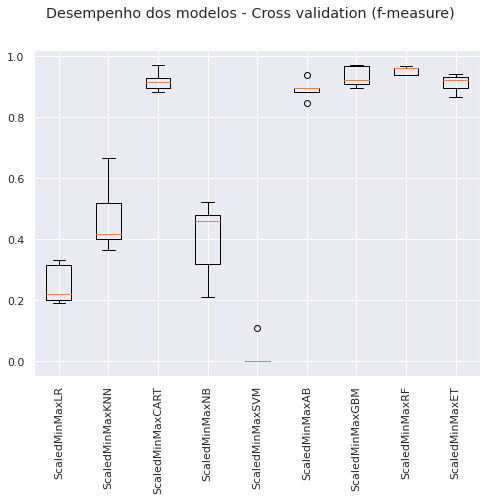

In [19]:
model_experimenter.plot_experiment_results()

Podemos verificar que os *modelos ensemble* apresentaram o melhor desempenho, 
seguidos pelo algoritmo simples de árvore de decisão. 

Uma constatação é de que para este problema, os algoritmos baseados em árvore de decisão entregam melhores resultados que os demais.

Para decidir o algoritmo com melhor desempenho, iremos considerar os seguintes fatores: **média de f-measure obtida pelo modelo, dispersão dos valores, presença de outliers.**

Os três algortimos que obtiveram as melhores médias são respectivamente o *GradientBoostClassifier*, *CART* e o *RandomForest*. Todos os algoritmos não produziram outliers. Os algoritmos *GradientBoostClassifier* e *CART* apresentaram maior dispersão, quando comparado com o *RandomForest*, de modo que neste caso iremos considera-lo como melhor opção.

### Otimização de parâmetros do modelo



In [20]:
class ModelOptimizer:
  """
  Esta classe modela um otimizador de modelos com base em grid search.
  """
  RANDOM_STATE = 15
  NUM_FOLDERS = 5
  SCORING = 'f1'

  def __init__(self):
    pass

  def optimize(self, pipeline, parameter_grid):
    """
    Função responsável por buscar os melhores parâmetros de um modelo.
    """
    np.random.seed(self.RANDOM_STATE)

    kfold = KFold(n_splits=self.NUM_FOLDERS)
    grid = GridSearchCV(estimator = pipeline, param_grid=parameter_grid, scoring=self.SCORING, cv=kfold)
    grid_result = grid.fit(X_train, Y_train)

    print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 
    return grid_result.best_score_, grid_result.best_params_


In [21]:
# Define o pipeline do modelo a ser construído
pipeline = Pipeline([('Scaler', MinMaxScaler()),('RF', RandomForestClassifier(random_state=15))])

# Define os parâmetros que devem ser experimentados
param_grid = {
  'RF__max_depth': [10, 20, 50, 100],
  'RF__max_features': ['auto', 'sqrt'],
  'RF__min_samples_leaf': [1, 2, 4],
  'RF__min_samples_split': [2, 5, 10],
  'RF__n_estimators': [10, 20, 50, 100],
  'RF__random_state':[15]
}

# Instancia o otimizador
model_optimizer = ModelOptimizer()
# Executa a otimizacão
model_optimizer.optimize(pipeline, param_grid);

Melhor: 0.958763 usando {'RF__max_depth': 10, 'RF__max_features': 'auto', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 50, 'RF__random_state': 15}


# Finalização do modelo

Finalmente, iremos aplicar o modelo finalizado em dados não vistos. Abaixo temos o resultado para esta execução. 

In [22]:
class ModelBuilder:
  """
  Esta classe modela o construtor de um modelo, executando atividades como o treino e o teste em dados não vistos.
  """
  def __init__(self, classifier):
    self.classifier = classifier
  
  def build(self, x_train, y_train):
    """
    Função responsável por construir o modelo e treiná-lo.
    """
    scaler = MinMaxScaler().fit(x_train)
    x_train = scaler.transform(x_train)

    self.classifier.fit(x_train, y_train)

  def test(self, x_test, y_test):
    """
    Esta função tem como objetivo testar um modelo construído em dados não vistos e calcular métricas de desempenho.
    """
    scaler = MinMaxScaler().fit(x_test)
    x_test = scaler.transform(x_test)
    y_pred = self.classifier.predict(x_test)

    fmeasure = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"  Test\n    Precision: {precision}\n    Recall: {recall}\n    F-measure: {fmeasure} ")
    return fmeasure, precision, recall

In [23]:
# Definição do classificador utilizando os melhores parâmetros achados na otimização
classifier = RandomForestClassifier(n_estimators=50, max_features="auto", min_samples_leaf=1, min_samples_split=2, random_state=15)

# Instanciando a classe que cria o modelo final
model = ModelBuilder(classifier)
# Constrói o modelo
model.build(X_train, Y_train)
# Testa o modelo nos dados não vistos e coleta as métricas de desempenho
fmeasure, precision, recall = model.test(X_test, Y_test)


  Test
    Precision: 0.9230769230769231
    Recall: 0.8888888888888888
    F-measure: 0.9056603773584906 


### Considerações finais

Como podemos ver, em dados não vistos o modelo apresenta uma boa performance na atividade de estimar a predisposição de um indivíduo desenvolver câncer cervical. **Entregando uma precisão de 92.30%, uma cobertura de 88.88% e um f-measure de 90.56%.**